# SMS Spam Classification

### Introduction

**This SMS Spam Classification project focuses on developing a robust model for automatic identification and classification of SMS messages as either spam or Ham. The project involves thorough data exploration, feature engineering, outlier removal, and data preprocessing, including tokenization, stopword removal, and lemmatization. Text data is transformed into numerical representations through vectorization, and label encoding is applied for model training. Four classification models, namely 'MultinomialNB', 'RandomForestClassifier', 'KNeighborsClassifier', and 'SVC', are built and evaluated using metrics such as accuracy scores, cross-validation results, classification reports, and confusion matrices. This project aims to contribute to effective SMS spam detection, emphasizing the application of natural language processing techniques and machine learning models for optimal performance.**

#### Import necessary modules

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

#### Load Dataset

In [2]:
df = pd.read_csv('/content/sample_data/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


The dataset consist of 5572 rows and 5 columns.

In [4]:
# Drop Unwanted Columns
df1 = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Rename Columns v1 and v2
df1.rename(columns={ "v1" : "Category", "v2" : "Text"}, inplace=True)
df1.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Exploration

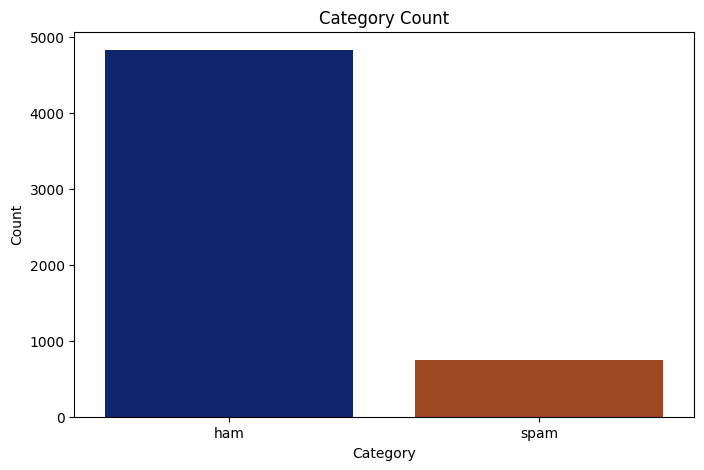

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Category', data=df1, palette='dark')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Count')
plt.show()

### Feature Engineering

In [9]:
# Add new features Characters_count, Words_count, Sentence_count
df1['Characters_count'] = df1.Text.apply(len)
df1['Words_count'] = df1.Text.apply(lambda row: nltk.word_tokenize(row)).apply(len)
df1['Sentence_count'] = df1.Text.apply(lambda row: nltk.sent_tokenize(row)).apply(len)
df1.head()

,Category,Text,Characters_count,Words_count,Sentence_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


### Outlier Removal

In [10]:
df1.describe()

,Characters_count,Words_count,Sentence_count
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


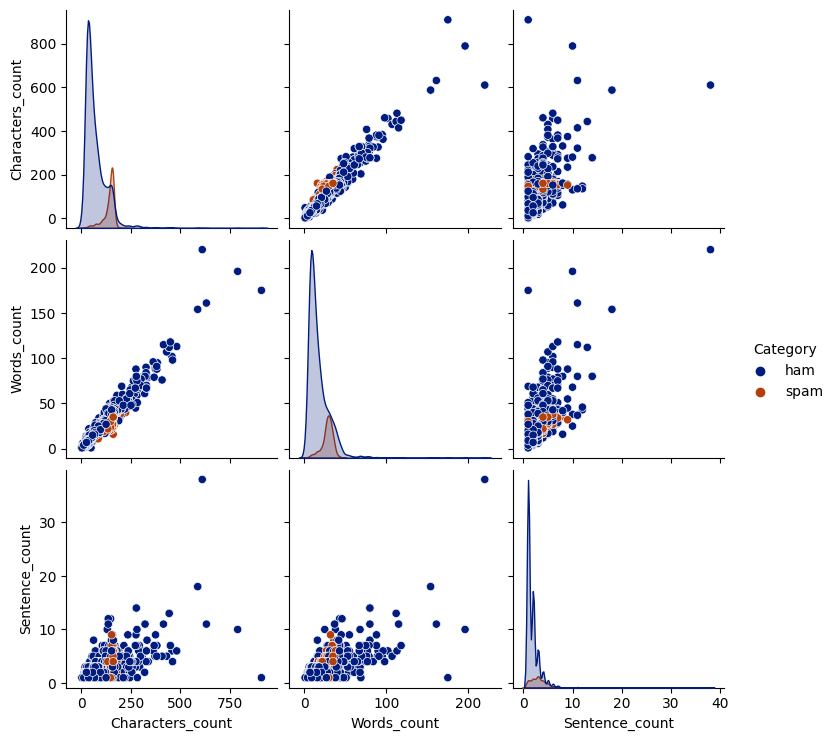

In [23]:
sns.pairplot(df1, hue='Category', palette='dark')
plt.show()

Upon analyzing the dataset using the describe method and visualizing relationships through a pair plot, it becomes evident that outliers exist within the data. Outliers, or data points significantly deviating from the general trend, were identified visually.

In [26]:
df1 = df1[df1['Characters_count']<350]
df1.shape

(5548, 5)

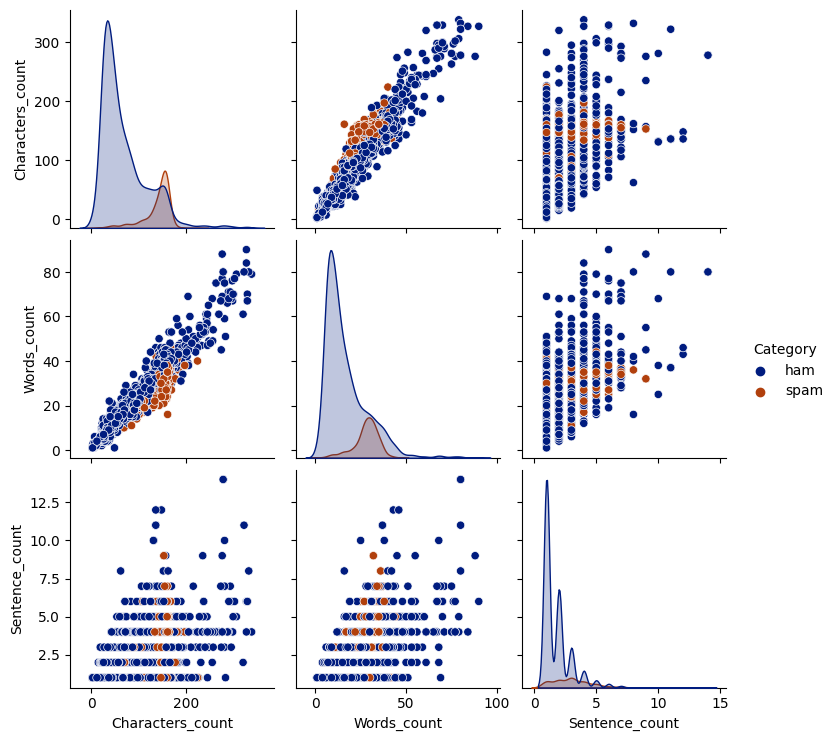

In [27]:
sns.pairplot(df1, hue='Category', palette='dark')
plt.show()

### Data Preprocessing

In [40]:
df1.Text[:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Text, dtype: object

In [35]:
# Remove Punctuations, numbers and convert characters to lowercase
def clean_text(Text):
  text = re.sub('[^a-zA-Z]', ' ', Text)
  text = text.lower()
  text = text.split()
  text = ' '.join(text)
  return text

df1['Clean_Text'] = df1.Text.apply(clean_text)

<ipython-input-35-c8c98a74444f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Clean_Text'] = df1.Text.apply(clean_text)


In [39]:
df1.Clean_Text[:5]

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in a wkly comp to win fa cup final ...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
Name: Clean_Text, dtype: object

### Tokenization

In [42]:
# Splitting Clean_Text to Words
df1['Tokenized_Text'] = df1.Clean_Text.apply(lambda row: nltk.word_tokenize(row))

<ipython-input-42-69b6d801b798>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tokenized_Text'] = df1.Clean_Text.apply(lambda row: nltk.word_tokenize(row))


In [43]:
df1.Tokenized_Text[:5]

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, a, wkly, comp, to, win, fa, ...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, don, t, think, he, goes, to, usf, he,...
Name: Tokenized_Text, dtype: object

### Removing Stopwords

In [51]:
def remove_stopword(Text):
  stopword = set(stopwords.words('english'))
  filtered_word = [word for word in Text if word not in stopword]
  return filtered_word

df1['Nostopword_Text'] = df1.Tokenized_Text.apply(remove_stopword)

<ipython-input-51-ff35112ba6a0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Nostopword_Text'] = df1.Tokenized_Text.apply(remove_stopword)


In [52]:
df1.Nostopword_Text[:5]

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3        [u, dun, say, early, hor, u, c, already, say]
4       [nah, think, goes, usf, lives, around, though]
Name: Nostopword_Text, dtype: object

### Lemmatization

In [56]:
lemmatizer = WordNetLemmatizer()

def lemmatize_word(Text):
  lemma = [lemmatizer.lemmatize(word, pos='v') for word in Text]
  return lemma

df1['Lemmatized_Text'] = df1.Nostopword_Text.apply(lemmatize_word)

In [58]:
df1.Lemmatized_Text[:5]

0    [go, jurong, point, crazy, available, bugis, n...
1                         [ok, lar, joke, wif, u, oni]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3        [u, dun, say, early, hor, u, c, already, say]
4          [nah, think, go, usf, live, around, though]
Name: Lemmatized_Text, dtype: object

### Vectorize

In [59]:
# Creating Lemmatized Text Corpus
corpus=[]
for i in df1.Lemmatized_Text:
  sms = ' '.join([row for row in i])
  corpus.append(sms)

corpus[:5]

['go jurong point crazy available bugis n great world la e buffet cine get amore wat',
 'ok lar joke wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though']

In [61]:
# Creating TF-IDF Matrix
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()

In [62]:
X.dtype

dtype('float64')

### Label Encoding

In [64]:
label_encoder = LabelEncoder()
df1['Category'] = label_encoder.fit_transform(df1.Category)
df1.head()

,Category,Text,Characters_count,Words_count,Sentence_count,Clean_Text,Tokenized_Text,Nostopword_Text,Lemmatized_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, live, around, though]"


### Model Building

In [67]:
# Training and Testing Data
y = df1.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
nb = MultinomialNB()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
svc = SVC()

nb.fit(X_train, y_train)
nb_pred=nb.predict(X_test)

rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)

kn.fit(X_train, y_train)
kn_pred=kn.predict(X_test)

svc.fit(X_train, y_train)
svc_pred=svc.predict(X_test)

### Evaluation

In [75]:
models = ['MultinomialNB', 'RandomForestClassifier', 'KNeighborsClassifier', 'SVC']
predictions = [nb_pred, rf_pred, kn_pred, svc_pred]

for Classifiers, pred in zip(models, predictions):
  accuracy=accuracy_score(y_test, pred)
  print(f'{Classifiers} : {accuracy}')

MultinomialNB : 0.963963963963964
RandomForestClassifier : 0.9765765765765766
KNeighborsClassifier : 0.9162162162162162
SVC : 0.9747747747747748


In [77]:
# Cross Validation
model = {'MultinomialNB':nb, 'RandomForestClassifier':rf, 'KNeighborsClassifier':kn, 'SVC':svc}

for Classifiers, model in model.items():
  cv_score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10)
  print(f'{Classifiers} : {cv_score.mean()}')

MultinomialNB : 0.9675518068858926
RandomForestClassifier : 0.9756629654485185
KNeighborsClassifier : 0.91145038944136
SVC : 0.9740863888719419


After evaluating the accuracy score and cross-validation scores, it is evident that the Random Forest classifier consistently exhibits high performance scores.

In [79]:
# Classification Report
for Classifiers, pred in zip(models, predictions):
  print(f'{Classifiers} \n : {classification_report(y_test, pred)}')

MultinomialNB 
 :               precision    recall  f1-score   support

           0       0.96      1.00      0.98       974
           1       1.00      0.71      0.83       136

    accuracy                           0.96      1110
   macro avg       0.98      0.85      0.90      1110
weighted avg       0.97      0.96      0.96      1110

RandomForestClassifier 
 :               precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       1.00      0.81      0.89       136

    accuracy                           0.98      1110
   macro avg       0.99      0.90      0.94      1110
weighted avg       0.98      0.98      0.98      1110

KNeighborsClassifier 
 :               precision    recall  f1-score   support

           0       0.91      1.00      0.95       974
           1       0.98      0.32      0.49       136

    accuracy                           0.92      1110
   macro avg       0.95      0.66      0.72      1110
weig

Random Forest Classifier has the highest accuracy of 98% among the models, followed closely by Support Vector Classifier (SVC) with an accuracy of 97%. RandomForestClassifier appears to be the best-performing model by analysing the classification report. It demonstrates high precision, recall, and f1-score for both classes, indicating a well-balanced performance across multiple evaluation criteria.

MultinomialNB


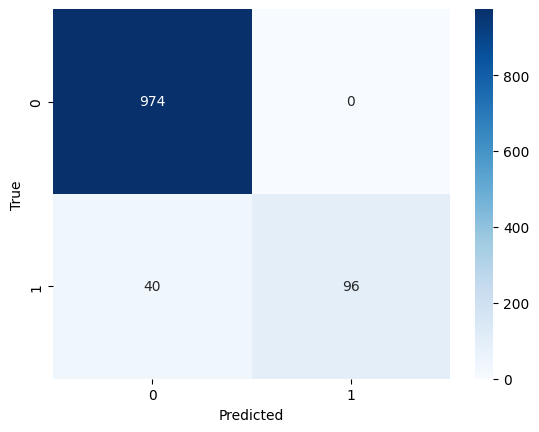

RandomForestClassifier


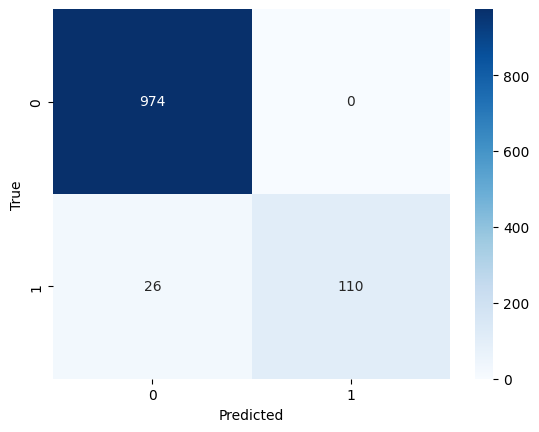

KNeighborsClassifier


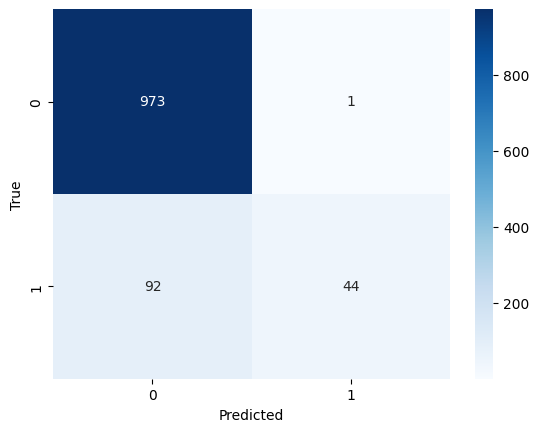

SVC


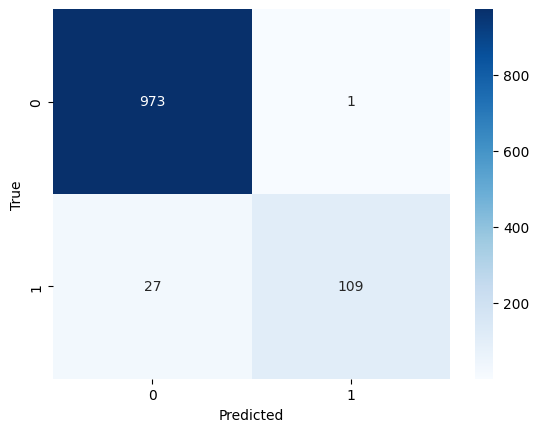

In [81]:
# Confusion Matrix
for model, prediction in zip(models, predictions):
    print(model)

    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


By examining the confusion matrices, it is evident that the Random Forest classifier outperforms the other models. Therefore, when considering overall performance, Random Forest appears to be the more effective choice among the models.